In [35]:
import arviz as az
import pymc as pm
import pytensor.tensor as pt
import pymc.math as pmm
import pytensor as pt0
import pytensor.sparse as pts
import pytensor.d3viz as d3v
import numpy as np
import math
import gzip
import json
import pandas as pd
from IPython.display import HTML
import dtale

az.style.use("arviz-darkgrid")

%load_ext autoreload
%autoreload 2
import whr

%load_ext pyinstrument

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The pyinstrument extension is already loaded. To reload it, use:
  %reload_ext pyinstrument


In [ ]:
games, gamePlayers = whr.readZklaBattles(whr.DEFAULT_MONTHS)
# gamePlayers.loc[1355996]
# gamePlayers.loc[(gamePlayers.team_id != 1) & (gamePlayers.team_id != 2)]

In [ ]:
dtale.show(games[games.loserCount==0])

In [ ]:
import IPython.display as id

# games[games.map_is_special != 0].value_counts('map_name')
# games[games.map_name.str.lower().str.contains('stepper')]
# games[games.map_name.str.lower().str.contains('dockside')]

In [ ]:
calculateCenteredRatings = False

coords = {'pl':np.arange(10)}

m1 = pm.Model(coords=coords, check_bounds=False)
m2 = pm.Model(coords=coords, check_bounds=False)

with m1:
    # r = pm.Normal('rating', mu = 0, sigma = 25, dims=('pl',))
    r = pm.Flat('rating', dims=('pl',))
    pm.Bernoulli('Outcomes W', logit_p = r, observed=[1])
    pm.Bernoulli('Outcomes L', logit_p = r, observed=[0])
    pm.Deterministic('p', pmm.invlogit(r), dims=('pl',))


    idata1 = pm.sample(draws=1000)

with m2:
    # p = 1/(1+exp(-g))
    # exp(-g) = 1/p - 1 = (1-p)/p
    # g = -ln((1-p)/p) = ln(p/(1-p))
    # p = pm.Beta('p', alpha=1, beta=1, dims=('pl',))
    p = pm.Uniform('p', lower=0,upper=1, dims=('pl',))
    # p = pm.Uniform.dist(lower=0,upper=1, dims=('pl',))
    pm.Deterministic('rating', pmm.logit(p), dims=('pl',))

    idata2 = pm.sample(draws=1000)



array([[<AxesSubplot: title={'center': 'rating'}>,
        <AxesSubplot: title={'center': 'p'}>]], dtype=object)

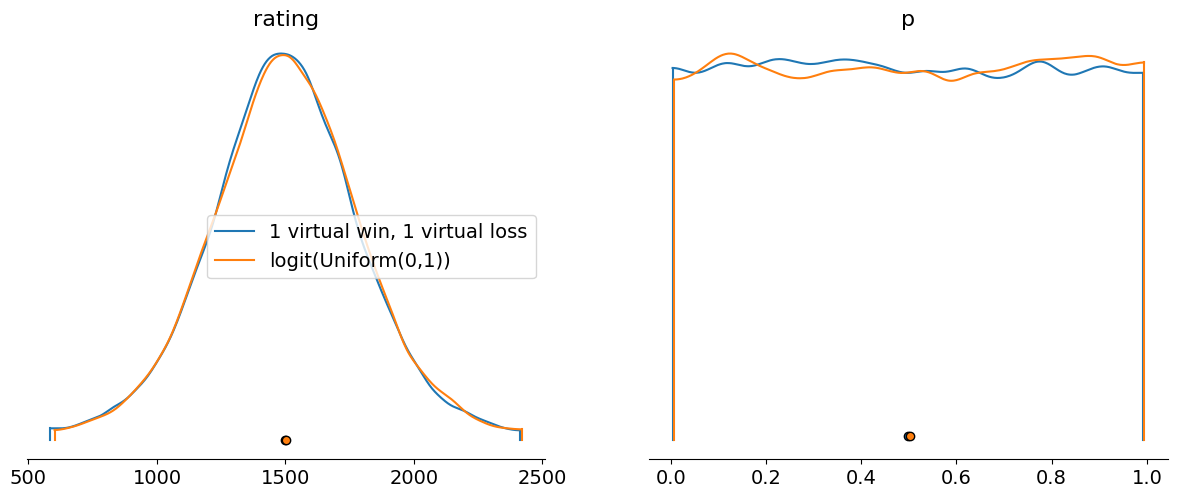

In [27]:
import whr
az.plot_density([idata.posterior.assign(rating = lambda d: whr.naturalRatingToElo(d.rating))
                    for idata in [idata1,idata2]], 
                combine_dims={'chain','draw','pl'}, hdi_prob=0.99, data_labels=['1 virtual win, 1 virtual loss', 'logit(Uniform(0,1))'])

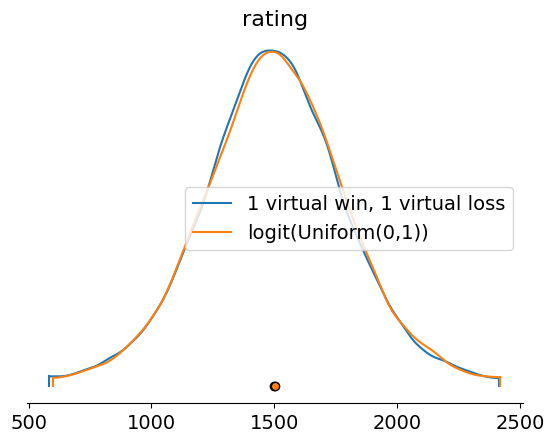

In [28]:
ax = az.plot_density([idata.posterior.rating.pipe(whr.naturalRatingToElo)
                    for idata in [idata1,idata2]], 
                combine_dims={'chain','draw','pl'}, hdi_prob=0.99, data_labels=['1 virtual win, 1 virtual loss', 'logit(Uniform(0,1))'])

([<matplotlib.axis.YTick at 0x7f8a5eecc550>,
 [Text(0, 0.0001, '0.01%'),
  Text(0, 0.001, '0.10%'),
  Text(0, 0.01, '1.00%'),
  Text(0, 0.1, '10.00%'),
  Text(0, 1.0, '100.00%')])

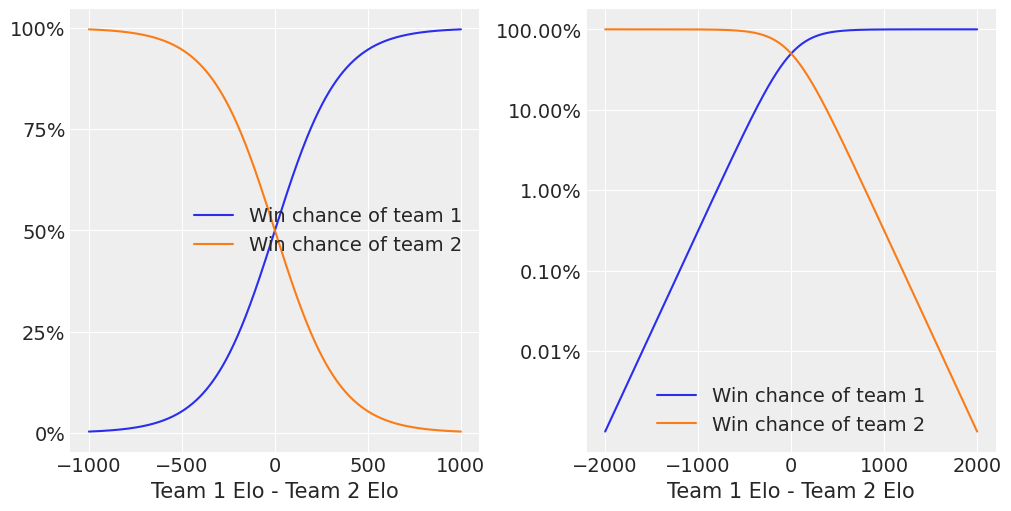

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
x = np.linspace(-1000, 1000, 1000)

plt.subplot(1, 2, 1)

plt.plot(x, 1/(1+np.exp(- whr.naturalRatingPerElo * x)), label='Win chance of team 1')
plt.plot(x, 1/(1+np.exp(whr.naturalRatingPerElo * x)), label='Win chance of team 2')

plt.xlabel('Team 1 Elo - Team 2 Elo')
ticks = np.linspace(0,1,5)
plt.yticks(ticks, [f'{t:.0%}' for t in ticks])
plt.legend()

plt.subplot(1, 2, 2)
x = np.linspace(-2000, 2000, 1000)

plt.semilogy(x, 1/(1+np.exp(- whr.naturalRatingPerElo * x)), label='Win chance of team 1')
plt.semilogy(x, 1/(1+np.exp(whr.naturalRatingPerElo * x)), label='Win chance of team 2')

plt.xlabel('Team 1 Elo - Team 2 Elo')
plt.legend()
ticks = np.logspace(-4,0,5)
plt.yticks(ticks, [f'{t:.2%}' for t in ticks])



-150000%


11.512925464970229

In [ ]:
pt0.dprint(m2.compile_logp().f)

In [ ]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats

plt.style.available

In [ ]:
plt.style.use('arviz-docgrid')

In [ ]:
x = np.expand_dims(np.linspace(500, 3500, 1000), 1)
# quantiles = np.array([0.01,0.05,0.25,0.5,0.75,0.95,0.99])
quantiles = np.linspace(0.1,0.9,9).round(1)
# s = 100 * 3/2 * stats.halfnorm.ppf(quantiles)
s = 1/400 * 3/2 * stats.halfnorm.ppf(quantiles)
y = 1/(1+np.exp(-(x-1500)*np.expand_dims(s, 0)))

fig = plt.figure(dpi=120)
ax = fig.subplots(ncols=2, sharex=True, sharey=True)
ax[0].set_title('half normal')
ax[0].plot(x, y)
ax[0].legend((1/s).round(1))

# s = 100 * stats.lognorm.ppf(quantiles, s=1)
s = 1/200 * stats.lognorm.ppf(quantiles, s=1)
y = 1/(1+np.exp(-(x-1500)*np.expand_dims(s, 0)))

ax[1].set_title('lognormal')
ax[1].plot(x, y)
ax[1].legend((1/s).round(1))

In [ ]:
import hashlib
import numpy as np
import pandas as pd
import itertools as iter

In [ ]:
# np.repeat([1,-1], 5)
import scipy.sparse as scs
m = scs.csr_matrix(([1,2,3,4], ([1,1,2,2],[1,3,1,2])))
display(m.todense())
m[[1,2],1].flatten()

In [ ]:
g = pd.DataFrame(dict(teamWon=[1,2,2,2,2]), index=pd.Index([10,11,12,13,14], name='game'))
gp = pd.DataFrame(dict(teamId=[1,2,2,1,1,1,2]), index = pd.MultiIndex.from_arrays([[10,10,11,11,11,12,13], [100,200,100,300,400,400,400]], names=('game','player') ))

# g.assign(bar = grp.loc[grp['p']=='p1'].count())
gp = gp.join(g, on='game', validate='m:1')
gp['won'] = gp.teamId == gp.teamWon

g['wc'] = gp.won.groupby('game').sum()
g['lc'] = (1-gp.won).groupby('game').sum()

display(gp)
# gp.loc(axis=0)[pd.MultiIndex.from_frame(pd.DataFrame({'game':[10,11], 'player': [100,300]}))]

In [ ]:
model2 = pm.Model()

Xsamp = np.random.normal(loc=30, size=100)

with model2:
    mu = pm.Cauchy('mu', alpha=1,beta=1)
    sig = pm.HalfNormal('sig')
    X = pm.Normal('X', mu=mu, sigma=sig, observed=Xsamp)
    idata = pm.sample(draws=3000)

# az.plot_posterior(idata)
az.plot_pair(idata, marginals=True, kind='kde')